# School Census Analysis

The dataset used for this analysis is taken from the US Census at School project that contains a wide variety of data obtained from questioned answered by high school students accross the US. The dataset is taken from this Excel file: http://bit.ly/2VuOA98.

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

# Initial Cleaning 

The two columns 'Outdoor_Activities_Hours' and 'Video_Games_Hours' are copied onto a new dataframe from a dataset that was loaded off of the internet. The columns are renamed for better clarity.

In [51]:
df = pd.read_excel("http://bit.ly/2VuOA98")
dfhours = df[['Outdoor_Activities_Hours', 'Video_Games_Hours']]
dfhours.dtypes
dfhours.columns = ['outdoor', 'vidgames']

Checks for unique values for each column.

In [52]:
print(dfhours.outdoor.unique())
print(dfhours.vidgames.unique())

[nan 17 0 20 5 12 8 2 6 10 25 14 11 16 15 50 3 14.5 13 7 18 43 1 9 21 35 24
 4 90 30 40 0.5 22 28 3.5 42 datetime.datetime(2019, 9, 10, 0, 0) 140 26
 '+2' 56]
[   nan    4.     0.    20.     6.     1.     2.    10.     5.     8.    12.
    3.    14.    28.    27.   144.    30.    35.   100.    18.    16.    45.
   15.    40.     7.    70.     9.    25.    92.    87.     0.3   19.    50.
    0.5   60.    56. ]


Removes those unique values.

In [53]:
dfhours.outdoor = pd.to_numeric(dfhours.outdoor, errors = 'coerce')
dfhours.vidgames = pd.to_numeric(dfhours.vidgames, errors = 'coerce')

Checks for correlation between the two columns.

In [54]:
dfhours.corr()

,outdoor,vidgames
outdoor,1.000000,0.069868
vidgames,0.069868,1.000000


Very weak correlation, check with histogram and scattor plot to make sure.

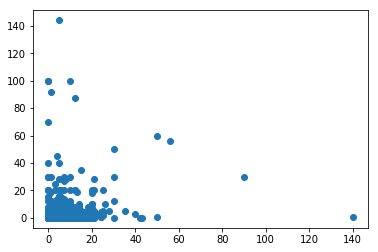

In [55]:
plt.scatter(dfhours.outdoor, dfhours.vidgames)
plt.show()

Seems like we don't need most of this blank spce, let's look at the histograms to make sure.

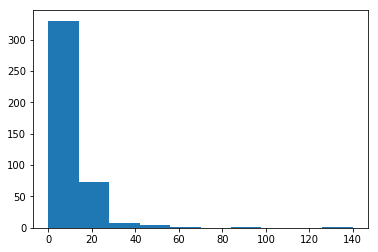

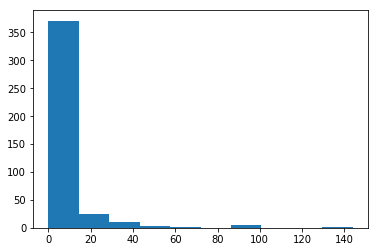

In [56]:
dfhours = dfhours.dropna()
plt.hist(dfhours.outdoor)
plt.show()
plt.hist(dfhours.vidgames)
plt.show()

Find 95th percentile for more accurate values for where to cut off each histrogram and eliminate extreme values. 

In [57]:
dfhours.describe(percentiles = [0.25, 0.5, 0.95])

,outdoor,vidgames
count,417.000000,417.000000
mean,8.749400,6.185372
std,11.299736,15.069922
min,0.000000,0.000000
25%,2.000000,0.000000
50%,6.000000,1.000000
95%,24.000000,28.400000
max,140.000000,144.000000


The following histograms will only include up to 24 Outdoor hours, and 28.4 video game hours or less. Let's make sure they look reasonable.

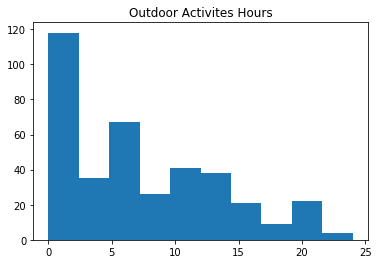

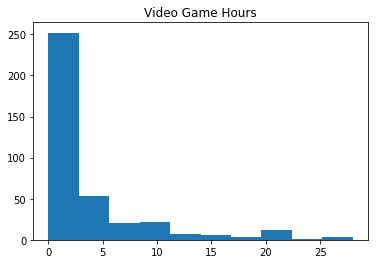

,outdoor,vidgames
count,381.000000,381.000000
mean,7.174541,3.362992
std,6.130627,5.552995
min,0.000000,0.000000
25%,2.000000,0.000000
50%,6.000000,1.000000
75%,11.000000,4.000000
max,24.000000,28.000000


In [58]:
dfhours = dfhours[dfhours.outdoor <= 24]
dfhours = dfhours[dfhours.vidgames <= 28.4]
plt.hist(dfhours.outdoor)
plt.title('Outdoor Activites Hours')
plt.show()
plt.hist(dfhours.vidgames)
plt.title('Video Game Hours')
plt.show()
dfhours.describe()

Checking correlation again

In [59]:
dfhours.corr()

,outdoor,vidgames
outdoor,1.000000,0.057354
vidgames,0.057354,1.000000


Still virtually non-existant. Check with scatter plot to confirm no relationship. 

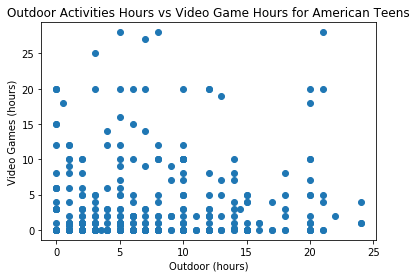

In [60]:
plt.scatter(dfhours.outdoor, dfhours.vidgames)
plt.title('Outdoor Activities Hours vs Video Game Hours for American Teens')
plt.xlabel('Outdoor (hours)')
plt.ylabel('Video Games (hours)')
plt.show()

# Statistical Significance

In [61]:
from scipy.stats import pearsonr
pearsonr(dfhours.outdoor, dfhours.vidgames)

(0.057354208008445602, 0.26410103475550079)

p-value = 0.264

Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is no relationship between hours spent doing outdoor activites and hours spent playing video games.

# Conclusion

Many people, including me before doing this data analysis, believed that hours a high schooler spends outdoors is related to how much time they spend in front of a screen playing video games. This analysis of a sample of high school students across the country shows that there is in fact no relationship between the two, and that my initial belief was wrong. 